In [42]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [18]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

start_june=dt.date(2017,6,1)
end_june=dt.date(2017,6,30)
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []
results = session.query(Measurement.date, Measurement.tobs).all()
#.filter(Measurement.tobs >= month_of_june).all()
print(results)

[('2010-01-01', 65.0), ('2010-01-02', 63.0), ('2010-01-03', 74.0), ('2010-01-04', 76.0), ('2010-01-06', 73.0), ('2010-01-07', 70.0), ('2010-01-08', 64.0), ('2010-01-09', 68.0), ('2010-01-10', 73.0), ('2010-01-11', 64.0), ('2010-01-12', 61.0), ('2010-01-14', 66.0), ('2010-01-15', 65.0), ('2010-01-16', 68.0), ('2010-01-17', 64.0), ('2010-01-18', 72.0), ('2010-01-19', 66.0), ('2010-01-20', 66.0), ('2010-01-21', 69.0), ('2010-01-22', 67.0), ('2010-01-23', 67.0), ('2010-01-24', 71.0), ('2010-01-25', 67.0), ('2010-01-26', 76.0), ('2010-01-27', 68.0), ('2010-01-28', 72.0), ('2010-01-30', 70.0), ('2010-01-31', 67.0), ('2010-02-01', 66.0), ('2010-02-03', 67.0), ('2010-02-04', 69.0), ('2010-02-05', 67.0), ('2010-02-06', 67.0), ('2010-02-07', 64.0), ('2010-02-08', 69.0), ('2010-02-09', 73.0), ('2010-02-11', 73.0), ('2010-02-12', 69.0), ('2010-02-13', 69.0), ('2010-02-14', 69.0), ('2010-02-15', 71.0), ('2010-02-16', 61.0), ('2010-02-17', 69.0), ('2010-02-19', 63.0), ('2010-02-20', 64.0), ('2010-02

In [40]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract


# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps = session.query(Measurement).filter(Measurement.date, extract('month', Measurement.date) == 6)
june_temps_list

[78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 77.0,
 77.0,
 82.0,
 78.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 78.0,
 73.0,
 70.0,
 76.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 75.0,
 76.0,
 76.0,
 77.0,
 78.0,
 76.0,
 77.0,
 75.0,
 77.0,
 76.0,
 76.0,
 75.0,
 77.0,
 77.0,
 76.0,
 78.0,
 77.0,
 76.0,
 77.0,
 76.0,
 76.0,
 77.0,
 77.0,
 78.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 73.0,
 75.0,
 77.0,
 76.0,
 77.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 79.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 78.0,
 77.0,
 76.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 76.0,
 77.0,
 75.0,
 76.0,
 74.0,
 75.0,
 77.0,
 76.0,
 77.0,
 78.0,
 79.0,
 77.0,
 78.0,
 79.0,
 78.0,
 78.0,
 78.0,
 78.0,
 79.0,
 79.0,
 82.0,
 80.0,
 79.0,
 79.0,
 78.0,
 78.0,
 77.0,
 78.0,
 78.0,
 73.0,
 75.0,
 75.0,
 76.0,
 84.0,
 79.0,
 76.0,
 79.0,

In [61]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_temps_list, columns=['June Temps'])
df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [62]:
df.dtypes



June Temps    float64
dtype: object

In [63]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


Text(0.5, 1.0, 'Temperatures in June')

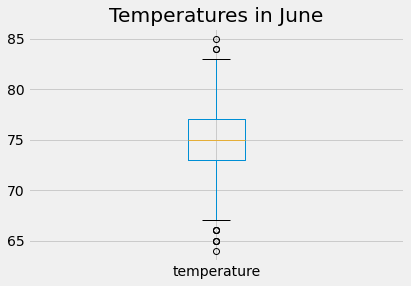

In [58]:
df.boxplot()
plt.title("Temperatures in June")


## D2: Determine the Summary Statistics for December

In [46]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

dec_temps = session.query(Measurement).filter(Measurement.date, extract('month', Measurement.date) == 12)


In [47]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
dec_temps_list

[76.0,
 74.0,
 74.0,
 64.0,
 64.0,
 67.0,
 77.0,
 66.0,
 69.0,
 68.0,
 68.0,
 71.0,
 74.0,
 67.0,
 66.0,
 69.0,
 71.0,
 70.0,
 70.0,
 74.0,
 74.0,
 71.0,
 75.0,
 75.0,
 72.0,
 69.0,
 68.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 73.0,
 71.0,
 73.0,
 73.0,
 77.0,
 72.0,
 71.0,
 73.0,
 70.0,
 73.0,
 69.0,
 74.0,
 72.0,
 71.0,
 72.0,
 72.0,
 70.0,
 73.0,
 73.0,
 72.0,
 73.0,
 73.0,
 72.0,
 63.0,
 65.0,
 71.0,
 76.0,
 70.0,
 76.0,
 69.0,
 69.0,
 69.0,
 74.0,
 76.0,
 74.0,
 73.0,
 73.0,
 74.0,
 73.0,
 73.0,
 73.0,
 74.0,
 74.0,
 71.0,
 73.0,
 72.0,
 64.0,
 66.0,
 73.0,
 72.0,
 65.0,
 64.0,
 69.0,
 68.0,
 77.0,
 71.0,
 71.0,
 69.0,
 68.0,
 68.0,
 69.0,
 70.0,
 72.0,
 76.0,
 75.0,
 69.0,
 71.0,
 71.0,
 71.0,
 68.0,
 65.0,
 70.0,
 69.0,
 69.0,
 71.0,
 67.0,
 73.0,
 74.0,
 73.0,
 67.0,
 74.0,
 75.0,
 75.0,
 74.0,
 67.0,
 73.0,
 73.0,
 71.0,
 72.0,
 71.0,
 68.0,
 65.0,
 69.0,
 70.0,
 70.0,
 74.0,
 71.0,
 74.0,
 73.0,
 72.0,
 74.0,
 72.0,
 74.0,
 75.0,
 74.0,
 70.0,
 74.0,
 70.0,
 66.0,
 61.0,
 63.0,

In [64]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df= pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [65]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0.5, 1.0, 'Temperatures in December')

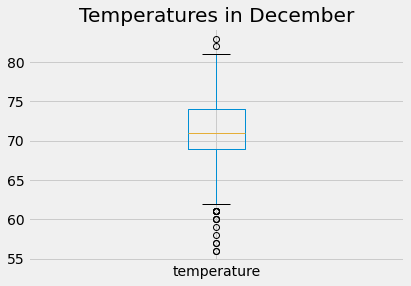

In [59]:
dec_df.boxplot()
plt.title("Temperatures in December")
